# FIT5196 Task 3 in Assessment 2
#### Student Name: Zhiqing Shu
#### Student ID: 28217551

Date: 13/05/2018

Version: 2.0

Environment: Python and Anaconda 

Libraries used:
* pandas 0.22.0 (for data frame, included in Anaconda Python 3.6)
* numpy 1.12.1 (for data format, included in Anaconda Python 3.6)
* sklearn 0.19.1 (for data mining and data analysis, included in Anaconda Python 3.6)
* seaborn 0.8.1 (for statistical data visualization, included in Anaconda Python 3.6)
* matplotlib 2.2.2 (for python 2D plotting, included in Anaconda Python 3.6)

## Introduction
In this task, you are required to find impute all the missing values by inspecting and analyzing the dataset3 (dataset3_with_missing.csv). In the end, save the fixed table in dataset3_solution.csv.

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.ensemble import RandomForestRegressor    
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit, train_test_split


import matplotlib.pyplot as plt


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2. Load the data and store it in a Panda DataFrame

In [2]:
dataset3 = pd.read_csv('dataset3_with_missing.csv')
dataset3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


### 3. Finding missing value and fill in the reasonable values

Firstly, we need to know in which colums, the missing value occurs. We can get this information by calling `dataset3.info()`.

In [3]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


**Columns with missing values:**
* bathrooms
* sqft_living      
* sqft_above       
* sqft_basement   

In [4]:
dataset3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

### 3.1 Fill in 'sqft_living', 'sqft_above' and 'sqft_basement'

Since `sqft_living`, `sqft_above` and `sqft_basement` are relevant to area. So we can try to check if there is any relationship between them.

According to the data description: 
* sqft_living: The square footage of the property's interior living space
* sqft_above: The square footage of the interior living space that is above ground level
* sqft_basement: The square footage of the interior living space that is below ground level

I guess **sqft_living = sqft_above + sqft_basement**

Using following code to prove my inference.

In [5]:
len(dataset3[dataset3.sqft_above + dataset3.sqft_basement == dataset3.sqft_living].index)

9767

In [6]:
len(dataset3[dataset3.sqft_above + dataset3.sqft_basement != dataset3.sqft_living].index)

200

9767 out of 9967 records prove my inference and there are 200 records not. While the sum of missing value from `sqft_living`, `sqft_above` and `sqft_basement` is also 200. Just check if there is missing value occuring in these 200 records.

In [7]:
dataset3[dataset3['sqft_above'] + dataset3['sqft_basement'] != \
         dataset3['sqft_living']].head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
146,6666830250,20140505T000000,712198,4,2.50,2450.0,4247,2.0,0,0,3,8,NaN,0.0,2013,0,98052,47.7048,-122.113
189,1223089050,20140506T000000,280000,3,1.75,NaN,11800,1.0,0,0,4,7,1630.0,0.0,1971,0,98045,47.4863,-121.730
250,3888100043,20140507T000000,350000,3,1.00,1010.0,9360,1.0,0,0,3,6,NaN,0.0,1981,0,98033,47.6874,-122.168
326,8857600820,20140508T000000,260000,4,1.50,2130.0,8800,1.0,0,0,3,7,NaN,1030.0,1962,0,98032,47.3830,-122.288
338,923049378,20140508T000000,207000,3,1.00,1490.0,8995,1.0,0,0,4,7,NaN,0.0,1954,0,98168,47.4901,-122.303
393,5341600030,20140509T000000,255000,2,1.00,960.0,28717,1.0,0,0,4,6,NaN,0.0,1984,0,98070,47.3356,-122.502
434,1219000043,20140509T000000,315000,5,1.75,2320.0,8100,1.0,0,0,4,7,1160.0,NaN,1956,0,98166,47.4631,-122.341
483,2113700235,20140512T000000,360000,4,2.00,NaN,5500,1.0,0,0,5,7,1010.0,720.0,1943,0,98106,47.5304,-122.353
503,7203101610,20140512T000000,265000,2,1.00,1290.0,2828,2.0,0,0,3,7,1290.0,NaN,2008,0,98053,47.6968,-122.025
509,4375700065,20140512T000000,315275,3,1.75,1440.0,8040,1.0,0,0,3,7,NaN,480.0,1951,0,98125,47.7128,-122.306


There is only one missing value in this three columns per record. So based on the relationship, **sqft_living = sqft_above + sqft_basement**, we can use the known value to get the unknown value.

In [8]:
index = dataset3[dataset3.sqft_above.isnull()].index
for i in index:
    dataset3.at[i, 'sqft_above'] = dataset3.at[i, 'sqft_living'] - dataset3.at[i, 'sqft_basement']

In [9]:
index = dataset3[dataset3.sqft_living.isnull()].index
for i in index:
    dataset3.at[i, 'sqft_living'] = dataset3.at[i, 'sqft_above'] + dataset3.at[i, 'sqft_basement']

In [10]:
index = dataset3[dataset3.sqft_basement.isnull()].index
for i in index:
    dataset3.at[i, 'sqft_basement'] = dataset3.at[i, 'sqft_living'] - dataset3.at[i, 'sqft_above']

check the result.

In [11]:
dataset3[dataset3.sqft_living.isnull() | dataset3.sqft_above.isnull() \
         | dataset3.sqft_basement.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [12]:
dataset3[dataset3.sqft_above + dataset3.sqft_basement != dataset3.sqft_living]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


### 3.2 Fill in 'Bathroom' 

The mssing value of `bathrooms` is not that easy to get. In real life, it is tends to be that a house has more bedrooms may also has more bathrooms, while there are house which has one bathrooms and serval rooms. In our dataset, we are not able to get the missing 'bathrooms' according to any other attribute directly, but we can try to find the correlation between them and predict `batnroom` by taking use of all known data.

Create a new dataframe with all complete data.

In [13]:
#Create a copy of original dataframe
dataset3_dropna = dataset3.copy()

In [14]:
dataset3_dropna.shape

(9967, 19)

In [15]:
# Drop null values
dataset3_dropna.dropna(subset=['bathrooms'],axis=0,inplace=True)

In [16]:
dataset3_dropna.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [17]:
dataset3_dropna.shape

(9567, 19)

In [18]:
dataset3_dropna['bathrooms'].isnull().sum()

0

Next step, we need to select features. This step is necessary since *it can shorter training times and reducing overfitting and variance(from Wikipedia).*

Although there are 18 attributes except for `bathrooms`, not all of them actually has relationship with bathrooms, we can exclude them by using our common sense. Here, I exclude `id`, `date`, `zipcode`,`lat` and `long`.

In [19]:
data = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','floors','view','condition','grade','sqft_above',
            'sqft_basement','yr_built','yr_renovated']
data = dataset3_dropna[data]
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3,1.50,1340.0,7912,0,1.5,0,3,7,1340.0,0.0,1955,0
1,2384000,5,2.50,3650.0,9050,0,2.0,4,5,10,3370.0,280.0,1921,0
2,342000,3,2.00,1930.0,11947,0,1.0,0,4,8,1930.0,0.0,1966,0
3,420000,3,2.25,2000.0,8030,0,1.0,0,4,8,1000.0,1000.0,1963,0
4,550000,4,2.50,1940.0,10500,0,1.0,0,4,7,1140.0,800.0,1976,0


We can use `pandas.DataFrame.corr()` function to get the correlation between `bathrooms` and other attributes.

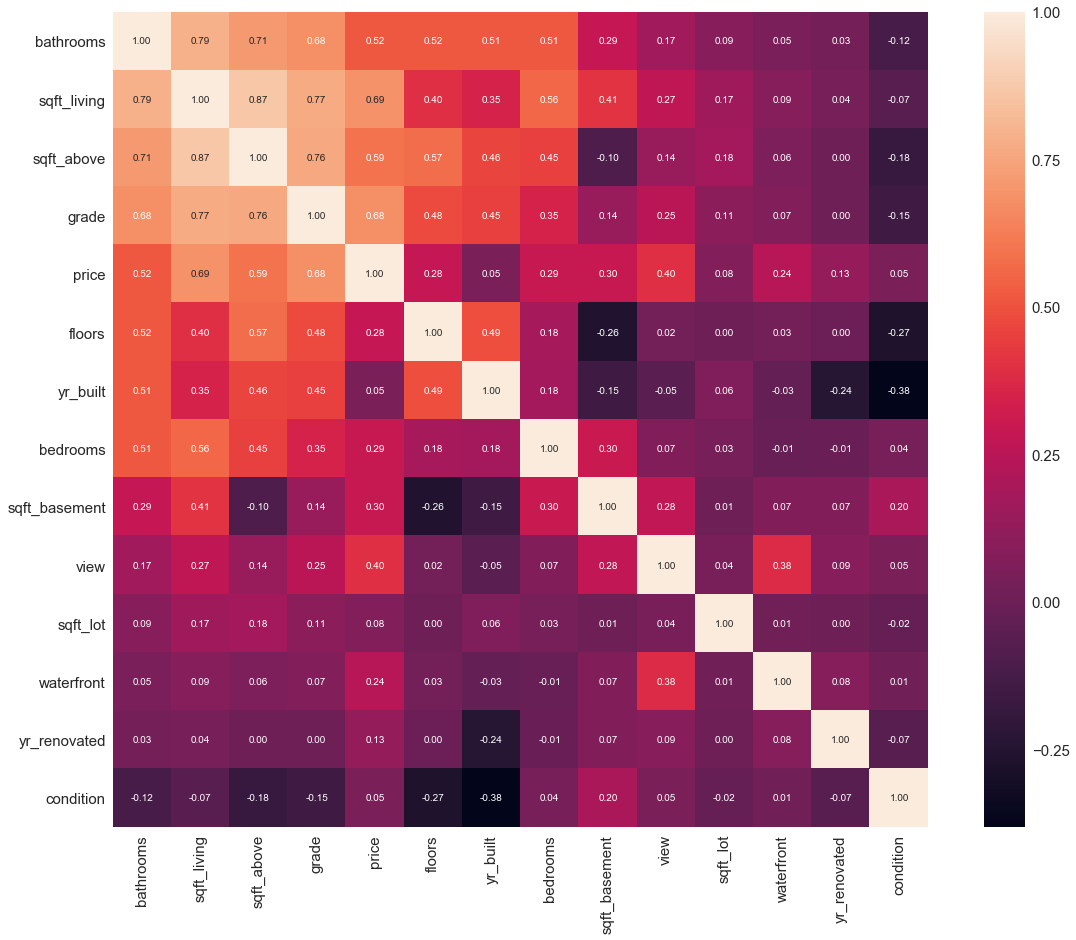

In [37]:
# Find correlationship among data
plt.subplots(figsize=(20,15))
corrmat = data.corr()
#number of variables for heatmap
k = 14 
# Get the rows of a DataFrame sorted by the n largest values of columns.
cols = corrmat.nlargest(k, 'bathrooms')['bathrooms'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()


We can see that attributes which have strong relationship with `bathroom` are `sqft_living`,`sqft_above`,`grade`,`price`,`floors`,`yr_built`, and `bedrooms` (coefficient > 0.5).

In [22]:
feature = ['sqft_living','sqft_above','grade','price','floors','yr_built','bedrooms']
features = dataset3_dropna[feature]

In [23]:
bathrooms = dataset3_dropna['bathrooms']

** Shuffle and Splite data into test and training datasets**
* Use `train_test_split` to shuffle and split the `features` and `bathroom` data into training and testing sets.
  * Split the data into 80% train data and 20% test data.
  * Set the `random_state` for `train_test_split` to 42 to ensures results are consistent.
  * Assign the train and test splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [24]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(features,bathrooms,test_size=0.20, random_state=42)

I decide to use `Random forests` model because it perform better than `Decision Tree` Model and `Linear Regression` Model in avoiding overfitting to their training set.

In [25]:
# def R2_score(y, y_pred):
#     score = r2_score(y, y_pred)
#     return score

In [26]:
# round the predicted value to .25, .5, .75. 0
def getQuarter(value, i):
    return (round(value * i) / i)

In [35]:
# Create a random forest regressor model
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
# or until all leaves contain less than min_samples_split samples.
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.


If int, then consider min_samples_leaf as the minimum number.
rf = RandomForestRegressor(max_depth=7,min_samples_leaf=7,random_state=0)    
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
y_pred = rf.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = getQuarter(y_pred[i], 4)
print(r2_score(y_test, y_pred))

0.792036775979
0.782972613698


We can get 0.79 R-squared score of model and 0.78 R-squared score the actual value and the predicted value, which proves that this model perform well enough in predicting `bathrooms` value.

Then, we can use predicted value to fill in the missing `bathroom` value.

In [28]:
dataset3_nan_bath = dataset3[dataset3.bathrooms.isnull()]

In [29]:
# Predict missing values
predict_result = rf.predict(dataset3_nan_bath[feature])
quarter_predict = []
for i in predict_result:
    quarter_predict.append(getQuarter(i, 4))

In [30]:
quarter_predict[:5]

[2.25, 2.25, 1.0, 2.5, 2.75]

In [31]:
# Fill null values
for i, value in enumerate(quarter_predict):
    dataset3.at[dataset3_nan_bath.index[i], 'bathrooms'] = value

Check if there is any missing value now.

In [32]:
dataset3[dataset3.isnull().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


### 4. Save the dataset into CSV file

In [33]:
dataset3.to_csv('dataset3_solution.csv', encoding = 'utf-8', index = False)

### 5. Reference

- Random Forest. Retrieved from: https://en.wikipedia.org/wiki/Random_forest
- sklearn. Retrieved from: http://scikit-learn.org/
- seaborn. Retrieved from: https://seaborn.pydata.org/
- matplotlib. Retrieved from: https://matplotlib.org/